In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("ford_car_price_prediction.csv")

print("Dimensões do dataset:", data.shape)
data.head(10)

Dimensões do dataset: (1460, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,145,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,145,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1460 non-null   object 
 1   year          1460 non-null   int64  
 2   price         1460 non-null   int64  
 3   transmission  1460 non-null   object 
 4   mileage       1460 non-null   int64  
 5   fuelType      1460 non-null   object 
 6   tax           1460 non-null   int64  
 7   mpg           1460 non-null   float64
 8   engineSize    1460 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 102.8+ KB


In [4]:
data.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,1460,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,1460.000000,1460.000000
unique,18,NaN,NaN,3,NaN,3,NaN,NaN,NaN
top,Fiesta,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,497,NaN,NaN,1313,NaN,944,NaN,NaN,NaN
mean,NaN,2016.993836,12280.198630,NaN,21907.027397,NaN,108.205479,58.609726,1.361438
std,NaN,1.632212,4447.710936,NaN,15874.464065,NaN,62.334075,9.577440,0.436243
min,NaN,2013.000000,3691.000000,NaN,5.000000,NaN,0.000000,20.900000,1.000000
25%,NaN,2016.000000,9000.000000,NaN,10174.000000,NaN,30.000000,54.300000,1.000000
50%,NaN,2017.000000,11199.000000,NaN,17863.500000,NaN,145.000000,58.900000,1.200000
75%,NaN,2018.000000,14998.000000,NaN,29859.750000,NaN,145.000000,65.700000,1.500000


In [5]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head()

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [6]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fueltype        0
tax             0
mpg             0
enginesize      0
dtype: int64

In [7]:
categorical_cols = ['model', 'transmission', 'fueltype']
numeric_cols = ['year','mileage','tax','mpg','enginesize','price']

for col in categorical_cols:
    print(f"Valores únicos em {col}:")
    print(data[col].value_counts())
    print()

Valores únicos em model:
model
Fiesta                   497
Focus                    413
Kuga                     198
EcoSport                  94
C-MAX                     57
Ka+                       53
Mondeo                    26
B-MAX                     25
Grand C-MAX               19
S-MAX                     13
Edge                      11
Tourneo Custom            11
Grand Tourneo Connect      8
KA                         8
Puma                       7
Galaxy                     7
Mustang                    7
Tourneo Connect            6
Name: count, dtype: int64

Valores únicos em transmission:
transmission
Manual       1313
Semi-Auto      78
Automatic      69
Name: count, dtype: int64

Valores únicos em fueltype:
fueltype
Petrol    944
Diesel    515
Hybrid      1
Name: count, dtype: int64



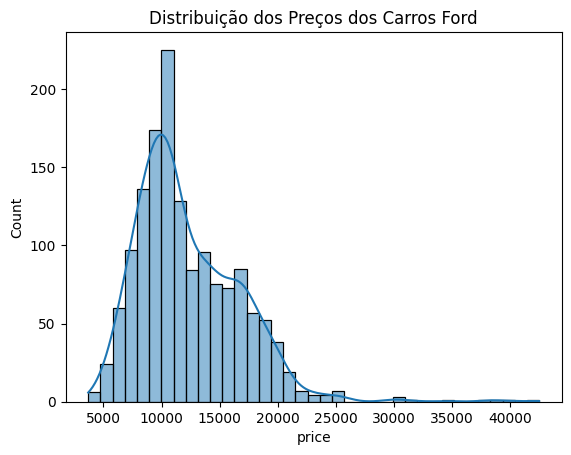

In [8]:
sns.histplot(data['price'], kde=True)
plt.title("Distribuição dos Preços dos Carros Ford")
plt.show()

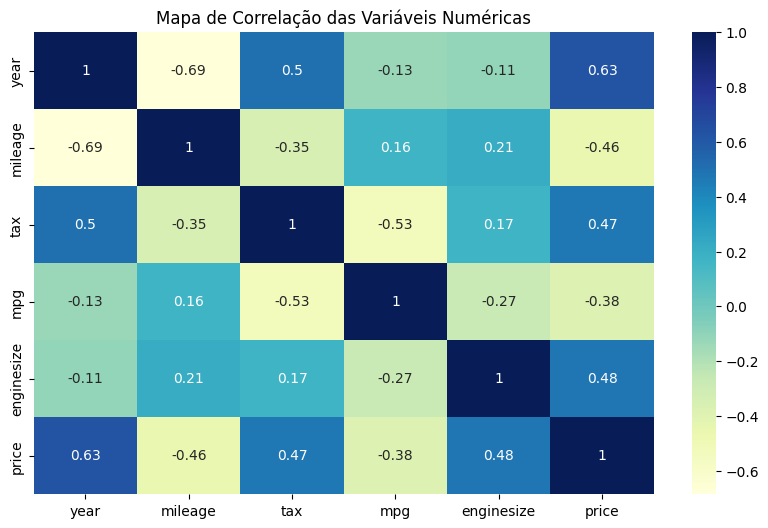

In [9]:
corr = data[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Mapa de Correlação das Variáveis Numéricas")
plt.show()

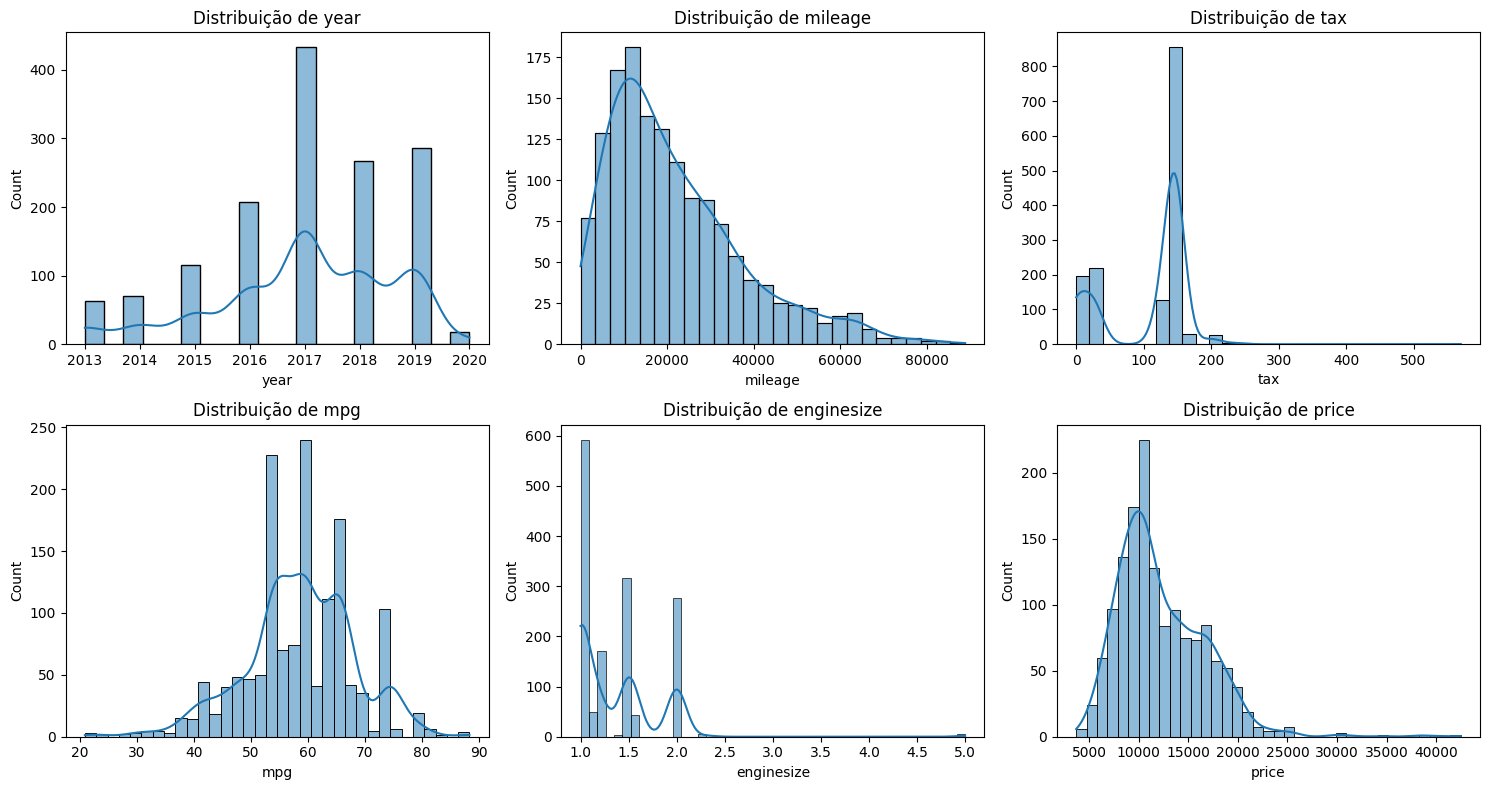

In [10]:
fig, axes = plt.subplots(2,3, figsize=(15,8))

num_vars = ['year','mileage','tax','mpg','enginesize','price']
axes = axes.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(data[var], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribuição de {var}")

plt.tight_layout()
plt.show()

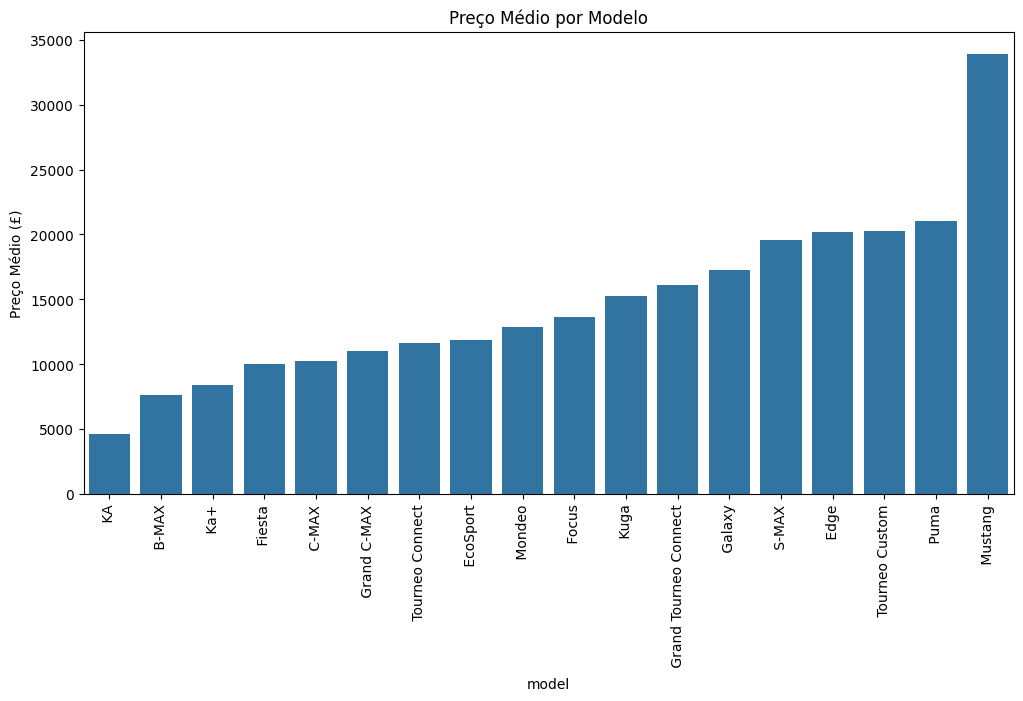

In [12]:
plt.figure(figsize=(12,6))
model_price = data.groupby('model')['price'].mean().sort_values()
sns.barplot(x=model_price.index, y=model_price.values)
plt.xticks(rotation=90)
plt.title("Preço Médio por Modelo")
plt.ylabel("Preço Médio (£)")
plt.show()

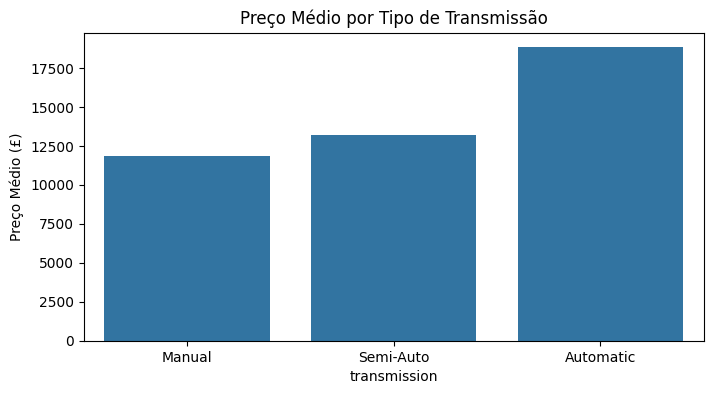

In [13]:
plt.figure(figsize=(8,4))
trans_price = data.groupby('transmission')['price'].mean().sort_values()
sns.barplot(x=trans_price.index, y=trans_price.values)
plt.title("Preço Médio por Tipo de Transmissão")
plt.ylabel("Preço Médio (£)")
plt.show()

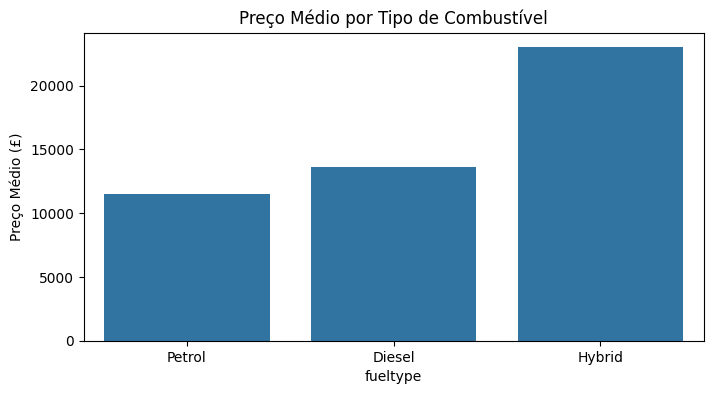

In [14]:
plt.figure(figsize=(8,4))
fuel_price = data.groupby('fueltype')['price'].mean().sort_values()
sns.barplot(x=fuel_price.index, y=fuel_price.values)
plt.title("Preço Médio por Tipo de Combustível")
plt.ylabel("Preço Médio (£)")
plt.show()

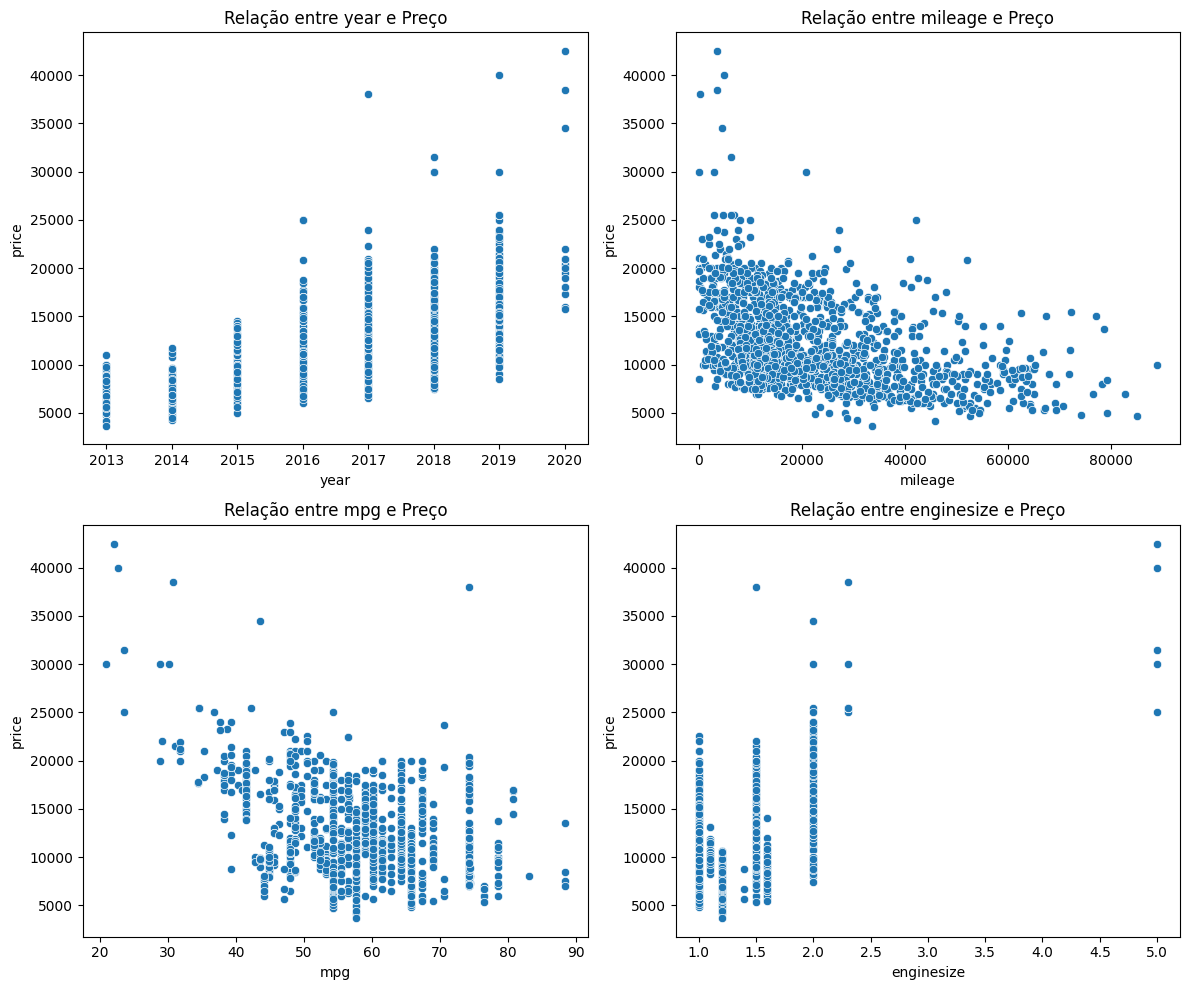

In [15]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
axes = axes.flatten()

num_vars_to_plot = ['year','mileage','mpg','enginesize']

for i, var in enumerate(num_vars_to_plot):
    sns.scatterplot(data=data, x=var, y='price', ax=axes[i])
    axes[i].set_title(f"Relação entre {var} e Preço")

plt.tight_layout()
plt.show()